# Deep Learning  Notes

### Toy Perceptron

In [3]:
import numpy as np

In [4]:
dp1 = {'partno': 100, 'maxtemp': 35, 'mintemp': 35, 'maxvibration': 12, 'asperity': 0.32}
dp2 = {'partno': 101, 'maxtemp': 46, 'mintemp': 35, 'maxvibration': 21, 'asperity': 0.34}
dp3 = {'partno': 130, 'maxtemp': 56, 'mintemp': 46, 'maxvibration': 3412, 'asperity': 12.42}
dp4 = {'partno': 131, 'maxtemp': 58, 'mintemp': 48, 'maxvibration': 3542, 'asperity': 13.43}

In [5]:
x1 = np.array([1] + [v for k, v in dp1.items()] [1:-1])
x2 = np.array([1] + [v for k, v in dp2.items()] [1:-1])
x3 = np.array([1] + [v for k, v in dp3.items()] [1:-1])
x4 = np.array([1] + [v for k, v in dp4.items()] [1:-1])

In [8]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [9]:
w_layer1 = np.random.rand(4)

def neuron(x):
    return sigmoid(x.dot(w_layer1))

In [10]:
neuron(x1)

0.9999905776559888

In [11]:
w_layer1 = np.random.rand(4,4)

def layer1(x):
    return sigmoid(x.dot(w_layer1))

In [12]:
x = np.array([x1,x2,x3,x4])

In [13]:
x

array([[   1,   35,   35,   12],
       [   1,   46,   35,   21],
       [   1,   56,   46, 3412],
       [   1,   58,   48, 3542]])

In [14]:
layer1(x)

array([[1.        , 1.        , 0.99999979, 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        ]])

In [15]:
w_layer2 = np.random.rand(4,4)

def layer2(x):
    return sigmoid(x.dot(w_layer2))

In [16]:
layer2(layer1(x))

array([[0.81406304, 0.87492758, 0.81747151, 0.96889498],
       [0.81406305, 0.87492759, 0.81747152, 0.96889499],
       [0.81406305, 0.87492759, 0.81747152, 0.96889499],
       [0.81406305, 0.87492759, 0.81747152, 0.96889499]])

###  Tensorflow 

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20190610135737-0000
KERNEL_ID = d7426973-3646-4346-b646-cc1533503bfc


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Instructions for updating:
Please use tf.data to implement this functionality.


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz


Instructions for updating:
Please use tf.data to implement this functionality.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
import tensorflow as tf

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


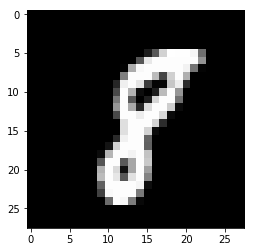

In [10]:
batch_xs, batch_ys = mnist.train.next_batch(1)
X = batch_xs
X = X.reshape([28, 28])
plt.gray()
print(batch_ys) #one-hot encoded vector
plt.imshow(X)

In [11]:
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
y_ = tf.placeholder(tf.float32, [None, 10])

In [13]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ *tf.log(y), reduction_indices = [1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

Instructions for updating:
Use tf.cast instead.


In [14]:
sess = tf.InteractiveSession()

In [16]:
tf.global_variables_initializer().run()

In [19]:
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict = {x: batch_xs, y_:batch_ys})

In [21]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

In [22]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [23]:
print(sess.run(accuracy, feed_dict={x : mnist.test.images, y_: mnist.test.labels}))

0.9172


### Keras Sequential Neural Networks

In [ ]:
# Install tensorflow backend
# pip install tensorflow

# Optionally install other dependencies
# pip install h5py graphviz pydot

# Install keras
# pip install keras

We can also import a loss function from the Keras loss module.  Same is true for optimizers.

In [11]:
# from keras.losses import mean_squared_error
# model.compile(loss=mean_squared_error, optimizer=...)

# instead of doing it as a string like
# model.compile(loss = 'mean_squared_error', optimizer = ...)

In [13]:
# from keras.optimizers import SGD
# sgd = SGD(lr = 0.01,
#          decay = 1e-6,
#          momentum = 0.9)
# model.compile(loss = mean_squared_error, optimizer=sgd)

# instead of doing it as a string like:
# model.compile(loss = ..., optimizer = 'sgd')
# if you do it as a string it will use all the defaults

In [4]:
# from keras.layers import Dense

# Dense(units,             # Number of output neurons
#      activation = None   # Default is none, change to sigmoid, relu etc
#      use_bias = True     # leave this on
#      kernel_initializer = 'glorot_uniform',
#      bias_initializer = 'zeros')

# from keras.layers import Dropout

# Dropout(rate,    # Fraction of units to drop out on each forward pass
#        seed=None)

In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [3]:
batch_size = 128
num_classes = 10
epochs = 20

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [9]:
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (784,))) # only include the input shape for the first layer
model.add(Dropout(rate = 0.2))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(rate = 0.2))
model.add(Dense(num_classes, activation = 'softmax'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])  #sgd = stocastic gradient decent

In [12]:
model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_test, y_test))

Instructions for updating:
Use tf.cast instead.


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 103us/step - loss: 1.2187 - acc: 0.6864 - val_loss: 0.5369 - val_acc: 0.8658
Epoch 2/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.5301 - acc: 0.8504 - val_loss: 0.3749 - val_acc: 0.8957
Epoch 3/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.4229 - acc: 0.8778 - val_loss: 0.3187 - val_acc: 0.9122
Epoch 4/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.3741 - acc: 0.8909 - val_loss: 0.2895 - val_acc: 0.9187
Epoch 5/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.3419 - acc: 0.8999 - val_loss: 0.2685 - val_acc: 0.9249
Epoch 6/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.3190 - acc: 0.9074 - val_loss: 0.2520 - val_acc: 0.9296
Epoch 7/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.2994 - acc: 0.9128 - val_loss: 0.2381 - val_ac

In [13]:
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.14342759463861585
Test accuracy: 0.9565


### Keras Recurrent Neural Networks

In [14]:
# from keras.layers.recurrent import LSTM

# LSTM(units,
#     activation = 'tanh',
#     recurrent_activation = 'hard_sigmoid',
#     recurrent_initializer = 'orthogonal',
#     recurrent_regularizer = None,
#     dropout = 0.0,
#     recurrent_dropout = 0.0,
#     return_sequences = False) # if you set this to true you'll get values for every time and the output will be a matrix instead of a vector

In [15]:
# from keras.layers.embeddings import Embedding

# Embedding(input_dim,        # Vocabulary size
#          output_dim,        # Output vector length
#          embeddings_initializer = 'uniform',
#          mask_zero = False) # Mask zero values

In [16]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000
maxlen = 80

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)

17465344/17464789 [==============================] - 0s 0us/step


In [17]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size = 32, epochs = 15, validation_data = (x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
 5664/25000 [=====>........................] - ETA: 4:29 - loss: 0.6932 - acc: 0.5055

KeyboardInterrupt: 

In [ ]:
model.evaluate(x_test, y_test, batch_size = 32)

### Keras Functional API for non-Sequential models

Often used when you already have atrained model and want new outputs

In [3]:
from keras.layers import Input, Dense
from keras.models import Model

num_classes = 10
inputs = Input(shape = (784,))

x = Dense(512, activation = 'relu')(inputs)
x = Dense(512, activation = 'relu')(x)

predictions = Dense(num_classes, activation = 'softmax')(x)

In [6]:
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#model.fil(...) same as before

### Saving and Loading Models (Serializing)

In [ ]:
from keras.models import model_from_json

# Save model as JSON and weights as HDF5
json_string = model.to_json() # or model.to_yaml()
model.save_weights('weights.h5')

# Load from JSON and set weights
model = model_from_json(json_string)
model.load_weights('weights.h5')

# to save/load the full model
from keras.models import load_model
model.save('full_model.h5')
model = load_model('full_model.h5')